In [1]:
pip install imutils

You should consider upgrading via the '/Users/shubhamraj/ocr/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image as im
import os

In [3]:
pip install pytesseract

You should consider upgrading via the '/Users/shubhamraj/ocr/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import cv2
from PIL import Image
import pytesseract as tess

In [5]:
def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    if (area < 1063.62 or area > 73862.5) or (ratio < 3 or ratio > 6):
        return False
    return True

In [6]:
def isMaxWhite(plate):
    avg = np.mean(plate)
    if(avg>=115):
        return True
    else:
         return False

In [7]:
def ratio_and_rotation(rect):
    (x, y), (width, height), rect_angle = rect

    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle

    if angle>15:
         return False

    if height == 0 or width == 0:
        return False

    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

In [8]:
def clean2_plate(plate):
    gray_img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    _, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
    if cv2.waitKey(0) & 0xff == ord('q'):
        pass
    num_contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if num_contours:
        contour_area = [cv2.contourArea(c) for c in num_contours]
        max_cntr_index = np.argmax(contour_area)

        max_cnt = num_contours[max_cntr_index]
        max_cntArea = contour_area[max_cntr_index]
        x,y,w,h = cv2.boundingRect(max_cnt)

        if not ratioCheck(max_cntArea,w,h):
            return plate,None

        final_img = thresh[y:y+h, x:x+w]
        return final_img,[x,y,w,h]

    else:
        return plate, None

Number  input image...


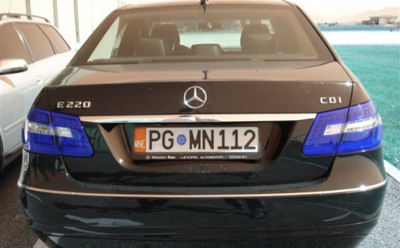

In [9]:
img = cv2.imread("car/Cars1.png")
print("Number  input image...",)
im.fromarray(img)

In [10]:
img2 = cv2.GaussianBlur(img, (3,3), 0)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [11]:
img2 = cv2.Sobel(img2,cv2.CV_8U,1,0,ksize=3)    
_,img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [12]:
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))

In [13]:
morph_img_threshold = img2.copy()

In [14]:
cv2.morphologyEx(src=img2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img2, num_contours, -1, (255,255,255), 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
for i,cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)
    if ratio_and_rotation(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        print("Number  identified number plate...")
        cv2.imshow("num plate image",plate_img)
        if cv2.waitKey(0) & 0xff == ord('q'):
            pass
        if(isMaxWhite(plate_img)):
            clean_plate, rect = clean2_plate(plate_img)
            if rect:
                fg=0
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1
                # cv2.imwrite("clena.png",clean_plate)
                plate_im = Image.fromarray(clean_plate)
                text = tess.image_to_string(plate_im, lang='eng')
                print("Number  Detected Plate Text : ",text)

Number  identified number plate...
